## 1. Introduction:
**Age** (numeric)<br>
**Sex** (text: male, female)<br>
**Job** (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)<br>
**Housing** (text: own, rent, or free)<br>
**Saving accounts** (text - little, moderate, quite rich, rich)<br>
**Checking account** (numeric, in DM - Deutsch Mark)<br>
**Credit amount** (numeric, in DM)<br>
**Duration** (numeric, in month)<br>
**Purpose** (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)<br>
**Risk** (Value target - Good or Bad Risk)

## 2. Libraries

In [1]:
# Stsandard libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import time
import warnings
warnings.filterwarnings('ignore')

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## 3. First Look at the data:¶
- Looking the Type of Data<br>
- Null Numbers<br>
- Unique values<br>
- The first rows of our dataset

In [2]:
#Lets load the dataset and sample some
# loading the dataset to pandas dataframe
data = pd.read_csv("german_credit_data.csv")
# Success
print("dataset has {} data points with {} variables each.".format(*data.shape))

dataset has 1000 data points with 11 variables each.


In [3]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
data.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,999,27,male,2,own,moderate,moderate,4576,45,car,good


In [5]:
#checking the number of rows and columns in dataframe 
print(data.shape)

(1000, 11)


In [6]:
#check missing values
data.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [7]:
# Get information about DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB
None


In [8]:
# Count the number of unique values in each column
num_unique = data.nunique()

# Print the results
print(num_unique)    

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64


In [9]:
# statistical measure of dataset
data.describe(include = 'all')

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,499.500000,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,288.819436,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,0.000000,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,249.750000,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,499.500000,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,749.250000,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


<!-- Data Information -->

- The dataset contains 1000 rows and 10 columns. 
- Two columns, namely "Saving accounts" and "Checking account," have null values as follows:
    - Saving accounts: 183 null values
    - Checking account: 394 null values


## 4. Some Exploatroy Data Analysis & Visulazation:

#### 4.1 Let's start looking through target variable and their distribuition

good    700
bad     300
Name: Risk, dtype: int64


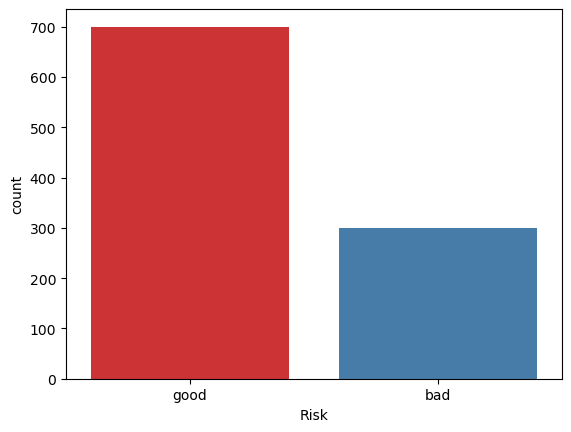

In [10]:
# Print the value counts for the 'Risk' column in the 'data' dataframe
print(data.Risk.value_counts())

# Create a countplot using seaborn and the 'Risk' column in the 'dataset' dataframe
ax = sns.countplot(data=data, x="Risk" ,palette = "Set1")

# Show the plot
plt.show()

#### 4.2 Numerical Features Analysis

In [11]:
num_cols = ['age', 'credit_amount', 'duration']
color_sequence = ['navy', 'mediumseagreen', 'navy']
numplot_analysis(data[num_cols], color_sequence=color_sequence, hist=True)
plt.show()

NameError: name 'numplot_analysis' is not defined

In [12]:
pip install viz_utils

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement viz_utils (from versions: none)
ERROR: No matching distribution found for viz_utils


In [ ]:
pip install --upgrade pip
